## Regression

In [223]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# request_name : (<coefficient>, <avg_rate>)

specs = np.array([
("products/science.html" ,     1.0, 110.0),
("products/non-fiction.html",  2.0, 20.0),
("products/fiction.html",      4.0, 30.0),
("api/comment",                5.0, 35.0),
("api/product/get.php",        6.0, 50.0),
("resources/js/basket.js",     10.0, 20.7)], dtype=object)

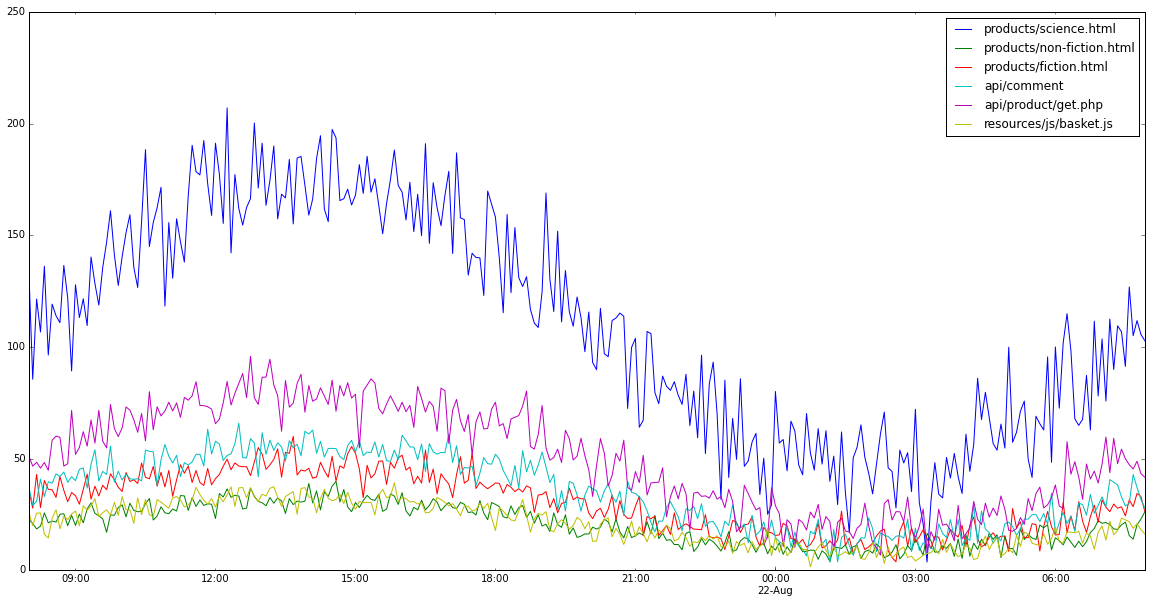

In [224]:
N = 12 * 24
rates = np.array([(np.full(N, 1.0) + 0.6 * np.sin(np.arange(0, 2 * np.pi, 2 * np.pi / N)) + 0.15 * np.random.normal(size=N)) * rate
    for rate in specs[:,2]])

rates[rates < 0] = 0
df = pd.DataFrame(rates.T, columns=specs[:,0])
df.index = pd.date_range('21/8/2016 08:00', periods=N, freq='5T')
df.plot(figsize=(20,10))

In [225]:
cpu = df.values.dot(specs[:,1])
cpu = cpu / (np.max(cpu)) * 54
cpu += 4 * np.random.normal(size=N)

cpu[cpu < 0] = 0.0

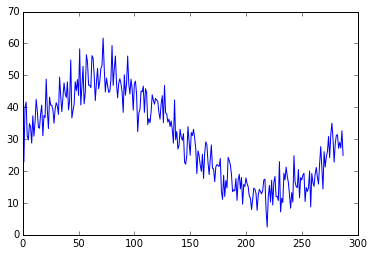

In [226]:
plt.plot(cpu)

In [227]:
df['CPU'] = pd.Series(cpu, index=df.index)

In [228]:
df.to_csv("data/request_rate_vs_CPU.csv")

### Challenge

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

D = 7
N = D * 24 * 4
print N

672


In [156]:
rate = np.full(N, 1.0) + 0.3 * np.sin(np.arange(0, 2 * D * np.pi, 2 * D * np.pi / N)) + 0.05 * np.random.normal(size=N)
rate *= 4
np.min(rate)

2.290515850983204

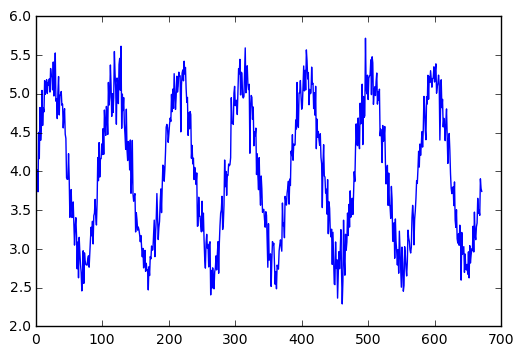

In [157]:
plt.plot(rate)

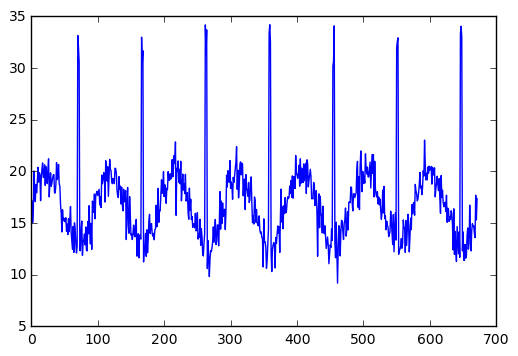

In [158]:
backup_pattern = np.zeros(N/D)
for i in range(70,73):
    backup_pattern[i] = 1

backup_pattern = np.concatenate([backup_pattern for _ in range(D)])

cpu = 4 + 3.1 * rate
cpu += 1 * np.random.normal(size=N)
cpu += 20 * backup_pattern

plt.plot(cpu)

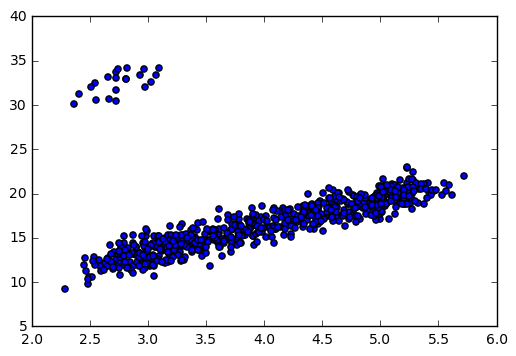

In [169]:
plt.scatter(rate, cpu)

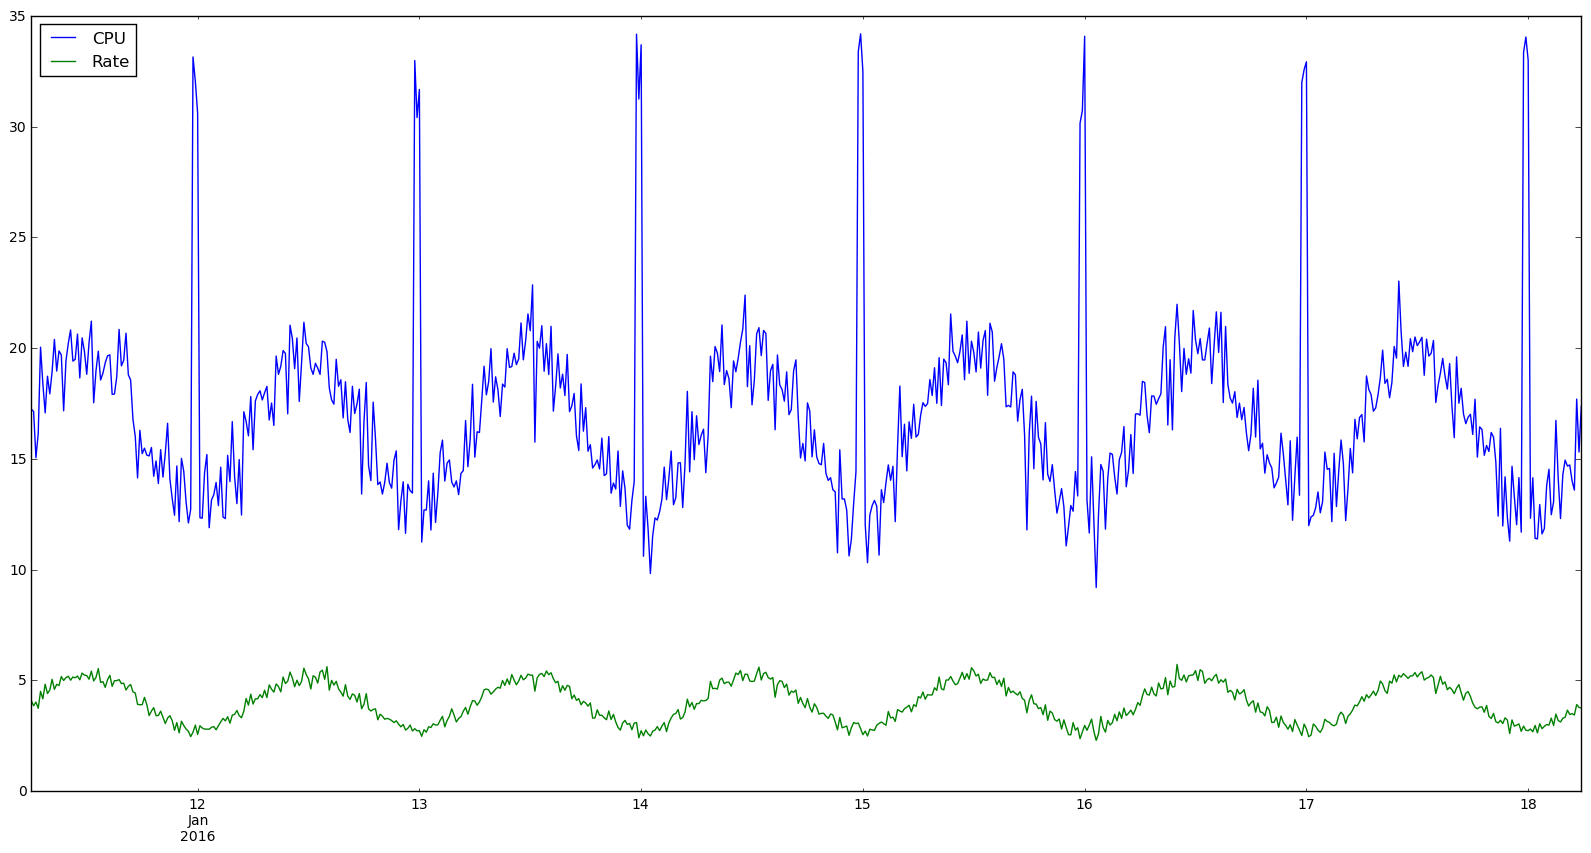

In [170]:
df_chall = pd.DataFrame.from_dict({"Rate" : rate, "CPU" : cpu})
df_chall.index = pd.date_range('1/11/2016 06:00', periods=N, freq='15T')
df_chall.plot(figsize=(20,10))
df_chall.to_csv("source/1/data/rate_cpu.csv")

In [171]:
from sklearn import linear_model
simple_lin_model = linear_model.LinearRegression()

In [172]:
simple_lin_model.fit(np.reshape(rate,(-1,1)),cpu)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

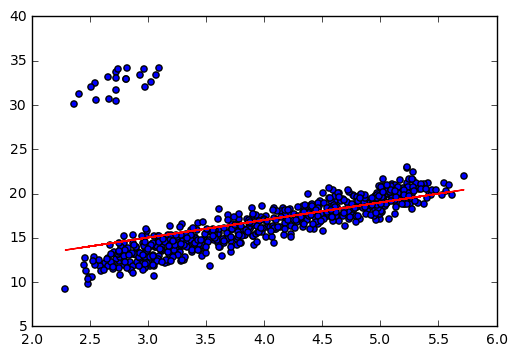

In [173]:
plt.scatter(rate,cpu)
plt.plot(rate, simple_lin_model.predict(np.reshape(rate,(-1,1))),color='red')

In [179]:
simple_lin_model.predict(11)

array([ 37.27002375])

In [180]:
filtered = np.array([(r,c) for (r,c) in zip(rate,cpu) if c < 25])
f_rate = filtered[:,0]
f_cpu = filtered[:,1]

In [181]:
simple_lin_model.fit(np.reshape(f_rate,(-1,1)),f_cpu)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

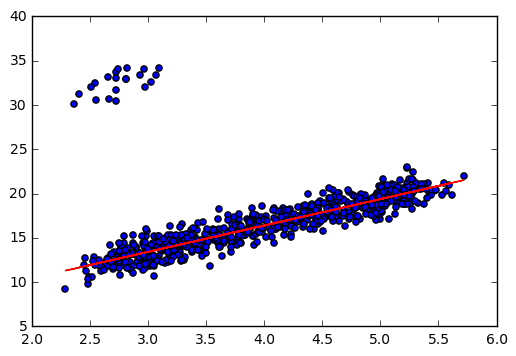

In [182]:
plt.scatter(rate,cpu)
plt.plot(rate, simple_lin_model.predict(np.reshape(rate,(-1,1))),color='red')

In [183]:
simple_lin_model.predict(11)

array([ 37.27002375])